In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


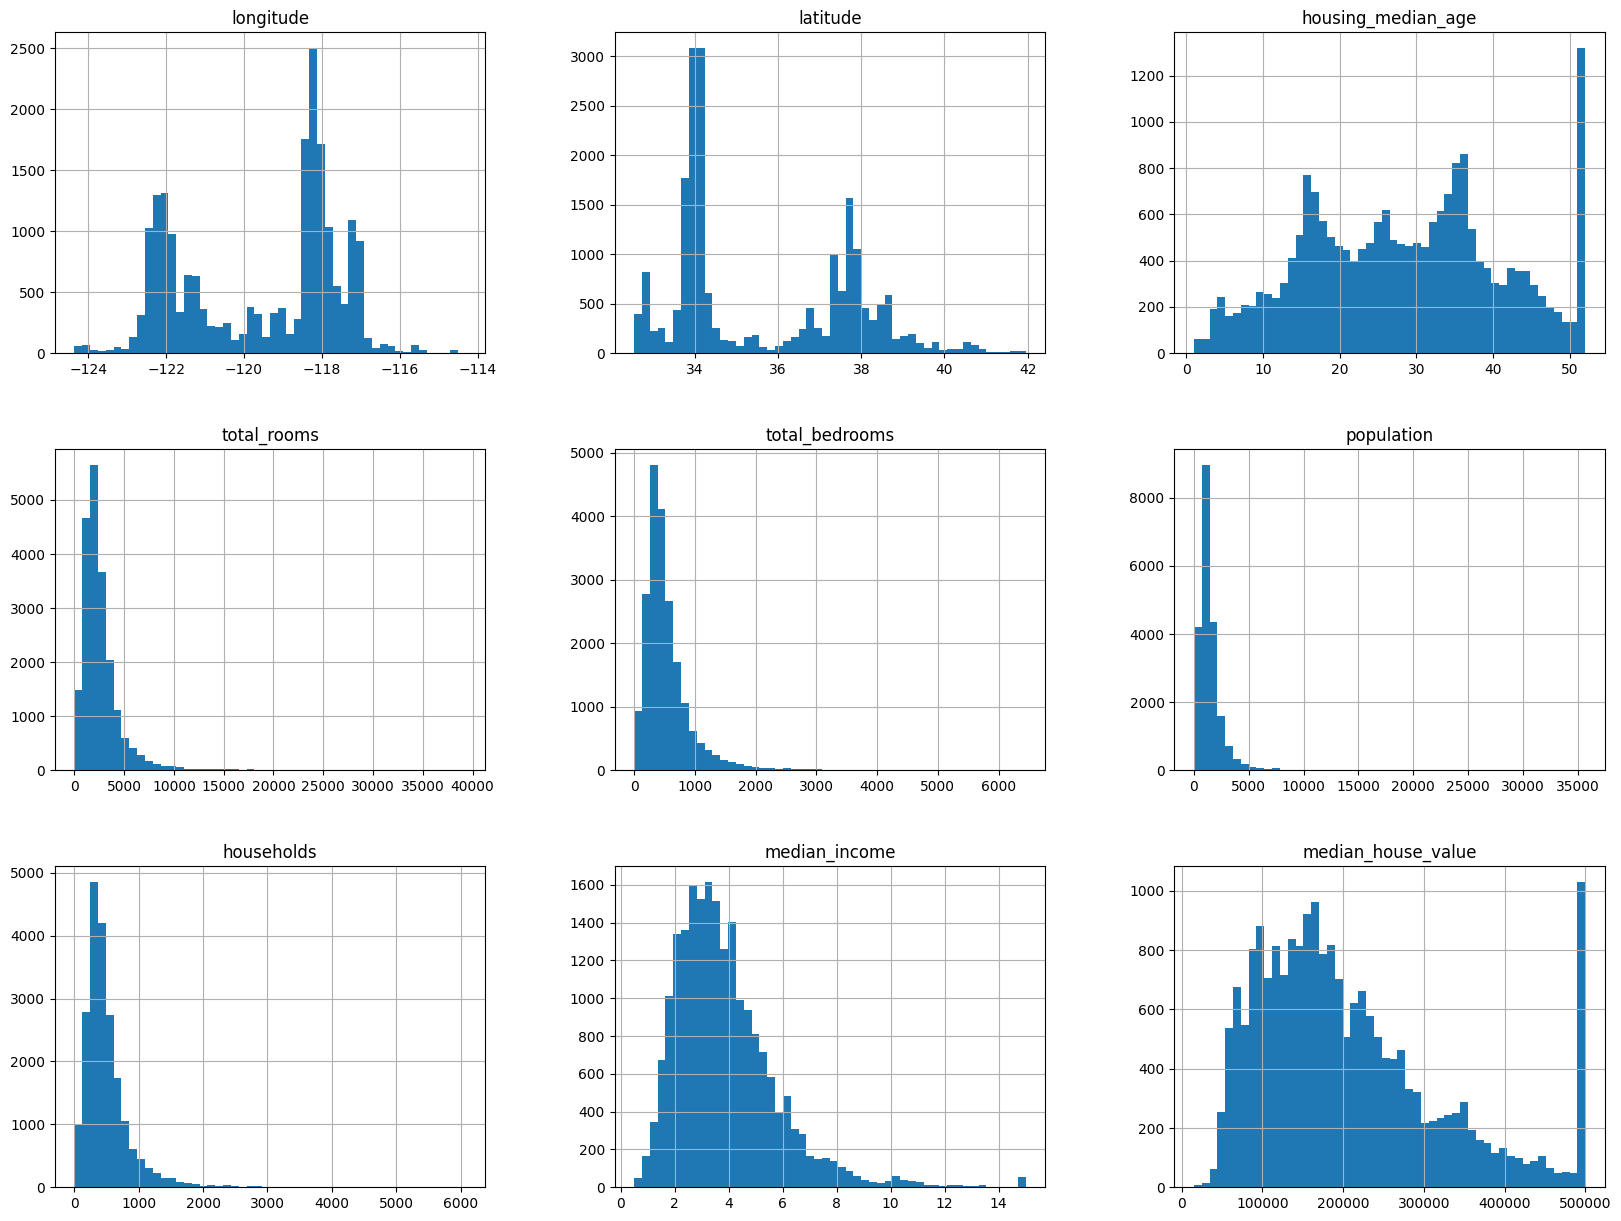

In [6]:
housing.hist(bins = 50 , figsize = (20,15))
plt.show()

In [7]:
# With above histograms , median_income seems to be an important feature.
# Categorizing median_income for further analysis by dividing it into 5 categories

housing['income_category'] = np.ceil(housing['median_income'] / 1.5)
housing['income_category'].where(housing['income_category'] < 5 , other = 5.0 , inplace = True)

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3.0


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 29)
for train_idx , test_idx in split.split(housing , housing['income_category']):
    strat_training_set = housing.loc[train_idx]
    strat_testing_set = housing.loc[test_idx]


In [10]:
housing['income_category'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [11]:
strat_testing_set['income_category'].value_counts() / len(strat_testing_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_category, dtype: float64

In [12]:
# Stratified Sampling helped in maintaining proportions

# I random sampling had been used , we could have missed out on less occuring values of category-1 

In [13]:
for i in (strat_training_set , strat_testing_set):
    i.drop("income_category" , axis = 1 , inplace = True)

In [14]:
housing = strat_training_set.copy()

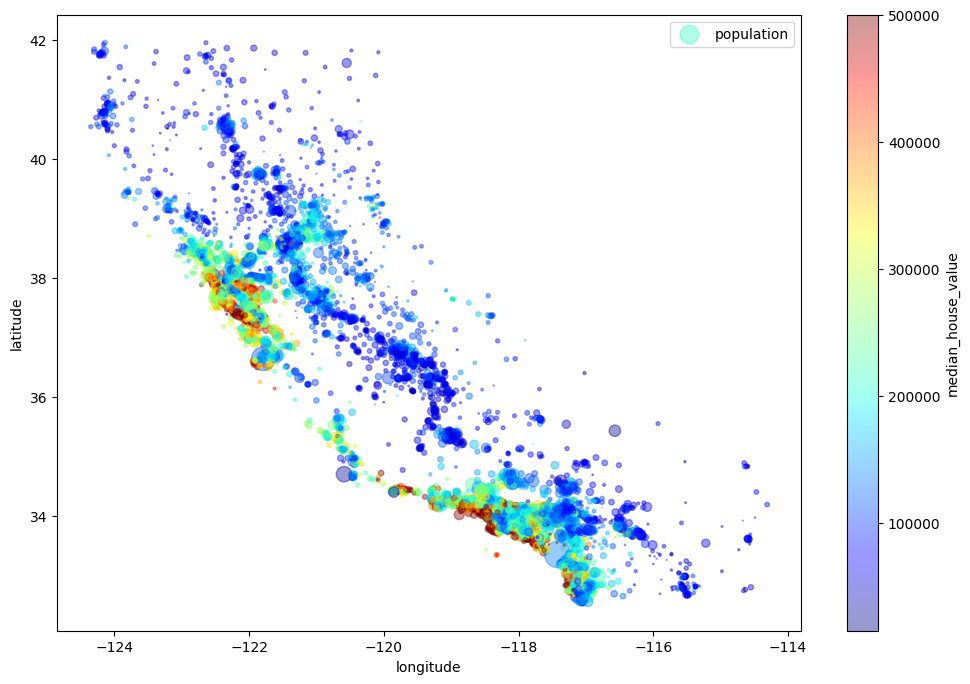

In [15]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100,label="population",figsize=(12,8),sharex=False,c="median_house_value",cmap = "jet")
plt.legend()

In [16]:
# import matplotlib.image as mpimg
# from PIL import Image
# temp = df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=df['population']/100,label="population",figsize=(12,8),sharex=False,c="median_house_value",cmap = "jet")

# cal_img = mpimg.imread('california.png')


# plt.imshow(cal_img , extent = [-124,-113.8,32.5,42.05] , alpha = 0.5 , cmap = "jet")
# plt.xlabel("Longitude" , fontsize=14)
# plt.ylabel("Latitude" , fontsize=14)

# plt.legend(fontsize=14)
# plt.show()

In [17]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691334
total_rooms           0.127498
housing_median_age    0.108481
households            0.060161
total_bedrooms        0.043991
population           -0.028239
longitude            -0.043977
latitude             -0.146227
Name: median_house_value, dtype: float64

In [18]:
# Our initial hypothesis that median_income could be an important factor was correct

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

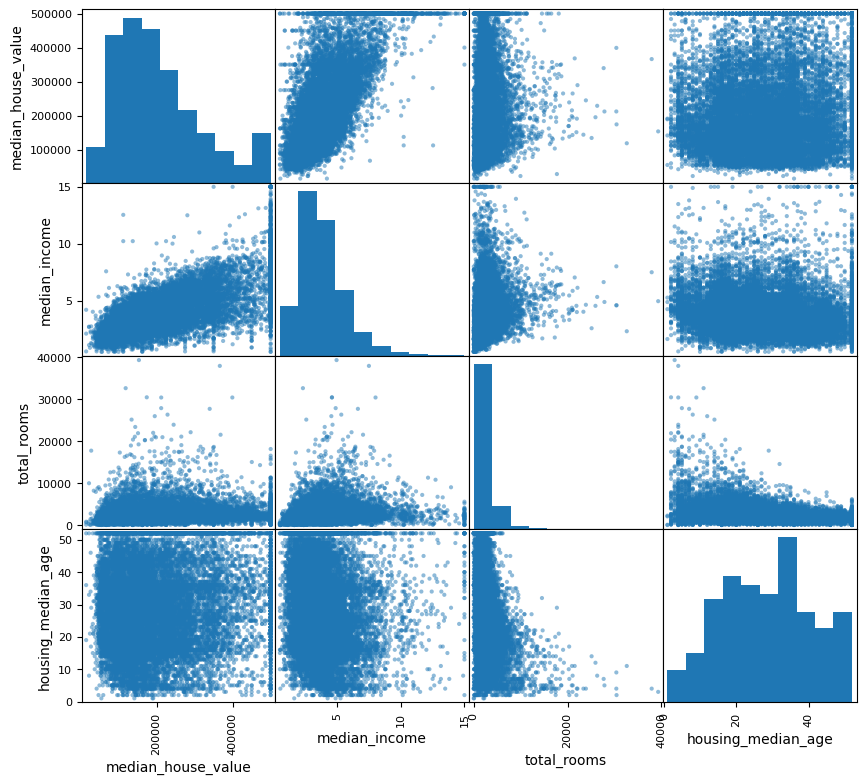

In [19]:
temporary = ["median_house_value" , "median_income" , "total_rooms" , "housing_median_age"]
from pandas.plotting import scatter_matrix
scatter_matrix(housing[temporary] , figsize=(10,9))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

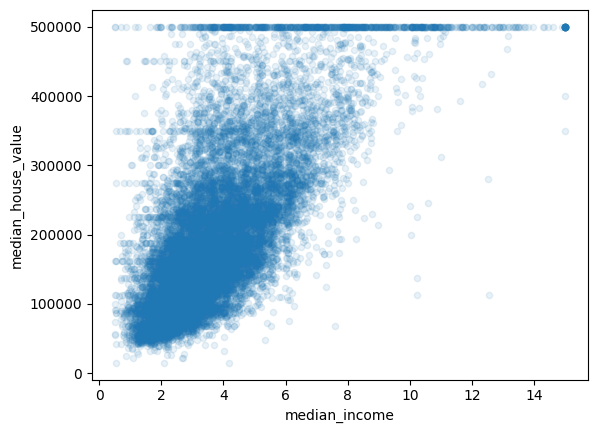

In [20]:
housing.plot(kind = "scatter" , x = "median_income" , y = "median_house_value" , alpha = 0.1)

In [21]:
# Feature Engineering 
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

In [22]:
corr_matrix = housing.corr(numeric_type = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

C:\Users\hp\AppData\Local\Temp\ipykernel_6932\1585776046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.691334
rooms_per_household         0.151990
total_rooms                 0.127498
housing_median_age          0.108481
households                  0.060161
total_bedrooms              0.043991
population_per_household   -0.021681
population                 -0.028239
longitude                  -0.043977
latitude                   -0.146227
bedrooms_per_room          -0.254016
Name: median_house_value, dtype: float64

In [23]:
# bedroom_per_room is highly negatively correlated to the median_house_value . Houses with lesser bedrooms per room are more expensive and vice versa

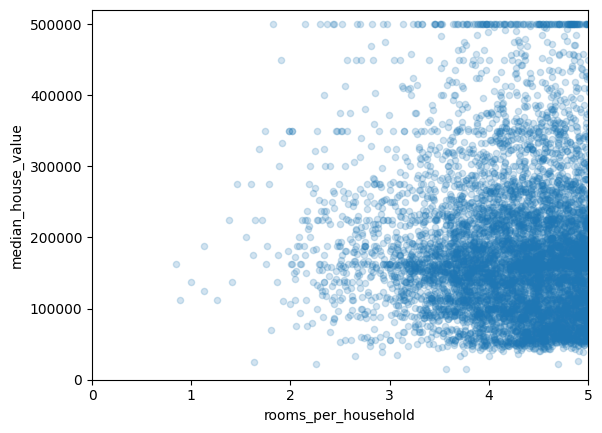

In [24]:
housing.plot(kind = "scatter" , x = "rooms_per_household" , y = "median_house_value" , alpha = 0.2)
plt.axis([0,5,0,520000])
plt.show()

In [25]:
# Data Preparation starts here

In [26]:
housing = strat_training_set.drop("median_house_value" , axis = 1)
housing_labels = strat_training_set["median_house_value"].copy()

In [27]:
incom_row = housing[housing.isnull().any(axis = 1)].head()
M = housing["total_bedrooms"].median()
incom_row["total_bedrooms"].fillna(M , inplace = True)
incom_row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31,1072,433.0,781,281,1.6563,INLAND
10236,-117.92,33.87,33,1597,433.0,1888,423,3.0550,<1H OCEAN
4309,-118.32,34.09,44,2666,433.0,2297,726,1.6760,<1H OCEAN
3921,-118.56,34.20,35,2273,433.0,1431,403,4.0789,<1H OCEAN
16879,-122.39,37.60,34,707,433.0,381,156,4.3750,NEAR OCEAN


In [28]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy = "median")

In [29]:
housing_num = housing.drop("ocean_proximity" , axis = 1)
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
temp = impute.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(temp , columns = housing_num.columns)

In [32]:
housing_tr[housing_tr.isnull().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [33]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
2,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604


In [34]:
cat_values = housing["ocean_proximity"]
cat_values.head()

8007      <1H OCEAN
18096     <1H OCEAN
5981         INLAND
3669      <1H OCEAN
14092    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [35]:
# Using factorize() to convert these values into categorical values

In [36]:
cat_encoded , housing_cat = cat_values.factorize()

In [37]:
cat_encoded[:10]

array([0, 0, 1, 0, 2, 3, 0, 0, 0, 0], dtype=int64)

In [38]:
housing_cat

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [39]:
# Custom Transformations Done Here

In [40]:
from sklearn.base import BaseEstimator , TransformerMixin

rooms_idx , bedrooms_idx , population_idx , household_idx = 3 , 4 , 5 , 6
class CombinedAttributesAdder(BaseEstimator , TransformerMixin):
    def __init__(self , add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self , x , y = None):
        return self
    
    def transform(self , x , y = None):
        rooms_per_household = x[:,rooms_idx] / x[:,household_idx]
        population_per_household = x[:,population_idx] / x[:,household_idx]
        
        if(self.add_bedrooms_per_room):
            bedrooms_per_room = x[:,bedrooms_idx] / x[:,rooms_idx]
            return np.c_[x , rooms_per_household , population_per_household , bedrooms_per_room]
        else:
            return np.c_[x , rooms_per_household , population_per_household]
    

In [41]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs , columns = list(housing.columns) + ["rooms_per_household" , "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.11,33.85,36,887,163.0,482,157,4.125,<1H OCEAN,5.649682,3.070064
1,-122.04,37.33,26,2690,401.0,1264,429,7.7643,<1H OCEAN,6.270396,2.946387
2,-117.74,34.1,29,2742,488.0,2477,532,3.5072,INLAND,5.154135,4.656015
3,-118.39,34.23,43,1193,299.0,1184,320,2.1518,<1H OCEAN,3.728125,3.7
4,-117.11,32.76,21,2226,600.0,1085,533,2.2604,NEAR OCEAN,4.17636,2.035647


In [43]:
# Pipeline Setting starts here for "numerical attributes" preprocessing

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy = "median")),
    ("attributes_adder" , CombinedAttributesAdder()),
    ("std_scaler" , StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.08523298,
        -0.00292009, -0.45066285],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.33148459,
        -0.01357928, -0.97149216],
       [ 0.91513496, -0.72011354,  0.02744924, ..., -0.11136143,
         0.13376642, -0.53762897],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.13786673,
        -0.02720971, -0.4451879 ],
       [ 0.63085685, -0.73878116, -0.37146108, ..., -0.91194187,
        -0.01098173,  1.88075105],
       [-1.30921661,  1.0019753 ,  0.90505196, ..., -0.3666513 ,
        -0.02289502,  0.4161723 ]])

In [45]:
class DFSelector(BaseEstimator , TransformerMixin):
    def __init__(self , attribute_names):
        self.attribute_names = attribute_names
    def fit(self , x , y = None):
        return self
    def transform(self , x , y = None):
        return x[self.attribute_names].values

In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

numerical_attributes = list(housing_num.columns)
categorical_attributes = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector" , DFSelector(numerical_attributes)),
    ("imputer" , SimpleImputer(strategy = "median")),
    ("attributes_adder" , CombinedAttributesAdder()),
    ("standard_scaler" , StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector" , DFSelector(categorical_attributes)),
    ("categorical_encoder" , OneHotEncoder(sparse = False))
])

In [47]:
# Uniting categorical and numerical pipelines into one 
from sklearn.pipeline import FeatureUnion

final_pipeline = FeatureUnion(transformer_list = [
    ("numerical_pipeline" , num_pipeline),
    ("categorical_pipeline" , cat_pipeline)
])

In [48]:
housing_data_prepared = final_pipeline.fit_transform(housing)
housing_data_prepared

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
# Selection and Training with Models

In [50]:
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()
lin_regression.fit(housing_data_prepared , housing_labels)

LinearRegression()

In [51]:
temporary_data = housing.iloc[:5]
temporary_labels = housing_labels.iloc[:5]

temporary_data_prepared = final_pipeline.transform(temporary_data)

In [52]:
print("Prediction : ",lin_regression.predict(temporary_data_prepared))
print("Actual Labels : ",list(temporary_labels))

Prediction :  [232035.89112672 380482.2530773  112115.91222308 157188.4422259
 182226.68776252]
Actual Labels :  [219500, 474700, 121900, 161600, 126300]


In [53]:
from sklearn.metrics import mean_squared_error as mse
housing_predictions = lin_regression.predict(housing_data_prepared)

lin_mse = mse(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67932.7700373929

In [54]:
# Decision Tree Regressor overfits unless parameters are not specified 
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(housing_data_prepared , housing_labels)

DecisionTreeRegressor()

In [55]:
housing_predictions = regressor_tree.predict(housing_data_prepared)
tree_mse = mse(housing_labels , housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

0.0

In [56]:
# Cross Validation on Decision Tree Regressor

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor_tree , housing_data_prepared , housing_labels , cv = 10 , scoring = "neg_mean_squared_error")
regressor_tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores_tree(scores):
    print("SCORES : ",scores)
    print("SCORES : ",scores.mean())
    print("SCORES : ",scores.std())
    
display_scores_tree(regressor_tree_rmse_scores)

SCORES :  [68683.77435197 69965.00318629 72508.75968083 70718.52094326
 69557.75596368 71620.79741139 69694.69588291 68851.65857541
 72736.53796645 69833.44929284]
SCORES :  70417.09532550296
SCORES :  1362.166618209337


In [58]:
lin_scores = cross_val_score(lin_regression , housing_data_prepared , housing_labels , cv = 10 , scoring = "neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores_tree(lin_rmse_scores)

SCORES :  [66658.67084538 70302.86819962 71566.38526718 65233.82017541
 64574.58761208 69256.95688732 66787.77183138 71451.60918566
 65360.54454616 72250.53672387]
SCORES :  68344.37512740682
SCORES :  2793.1623572414965


In [59]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(housing_data_prepared , housing_labels)

RandomForestRegressor(random_state=42)

In [60]:
housing_predictions = random_forest.predict(housing_data_prepared)

forest_scores = cross_val_score(random_forest , housing_data_prepared , housing_labels , cv = 10 , scoring = "neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores_tree(forest_rmse_scores)

SCORES :  [47662.03307363 50985.50874853 51042.07823683 47002.88550555
 47400.88248597 52700.03501848 48591.19347529 48850.56391678
 47639.33324066 51271.85255659]
SCORES :  49314.63662582981
SCORES :  1906.5834941288833


In [61]:
# Performing Hyperparameter Tuning Using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators" : [30,60,90,120] , "max_features" : [2,3,4]} , 
             {"bootstrap" : [False] , "n_estimators" : [90,120] , "max_features" : [2,3,4]}]

random_forest_2 = RandomForestRegressor(random_state = 11)
grid_search = GridSearchCV(random_forest_2 , param_grid , cv = 5 , scoring = "neg_mean_squared_error" , return_train_score = True)
grid_search.fit(housing_data_prepared , housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=11),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [30, 60, 90, 120]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [90, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_features': 4, 'n_estimators': 120}
RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=120,
                      random_state=11)


In [63]:
random_forest_2 = grid_search
random_forest_2.fit(housing_data_prepared , housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=11),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [30, 60, 90, 120]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [90, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
rand = random_forest_2.predict(housing_data_prepared)
rand_mse = mse(housing_labels , housing_predictions)
rand_rmse = np.sqrt(rand_mse)
rand_rmse 

18331.015390284127

In [65]:
# Above obtained rand_rmse is much smaller than lin_rmse obtained during Linear Regression